In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
df=pd.read_csv("StudentPerformanceFactors.csv")
print(df.head(10))

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No          

In [16]:
df=df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Physical_Activity', 'Exam_Score']]
df.dropna(inplace=True)
df

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Physical_Activity,Exam_Score
0,23,84,7,73,3,67
1,19,64,8,59,4,61
2,24,98,7,91,4,74
3,29,89,8,98,4,71
4,19,92,6,65,4,70
...,...,...,...,...,...,...
6602,25,69,7,76,2,68
6603,23,76,8,81,2,69
6604,20,90,6,65,2,68
6605,10,86,6,91,3,68


In [19]:
df.isnull().sum()
df.dropna(inplace=True)


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Physical_Activity,Exam_Score
0,23,84,7,73,3,67
1,19,64,8,59,4,61
2,24,98,7,91,4,74
3,29,89,8,98,4,71
4,19,92,6,65,4,70
...,...,...,...,...,...,...
6602,25,69,7,76,2,68
6603,23,76,8,81,2,69
6604,20,90,6,65,2,68
6605,10,86,6,91,3,68


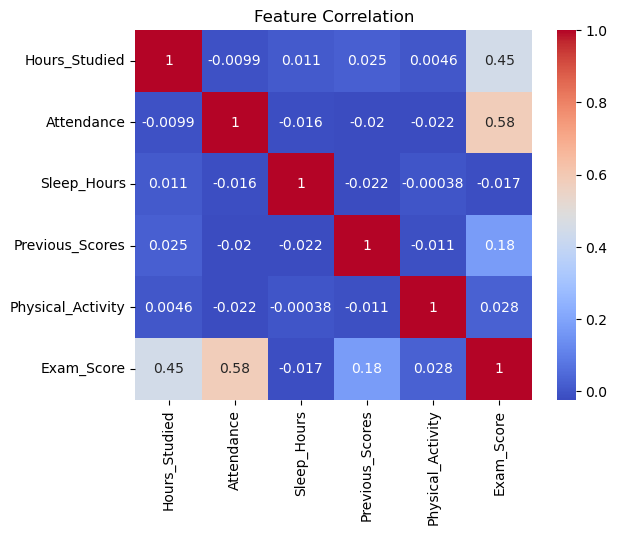

In [23]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [6]:
df.duplicated().sum()

np.int64(0)

In [54]:
x=df[['Hours_Studied','Attendance']]
y=df['Exam_Score']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [56]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(x_test)

In [58]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 1.483637378291563
MSE: 6.431915231725648
RMSE: 2.536122085335335
R² Score: 0.5350149742301384


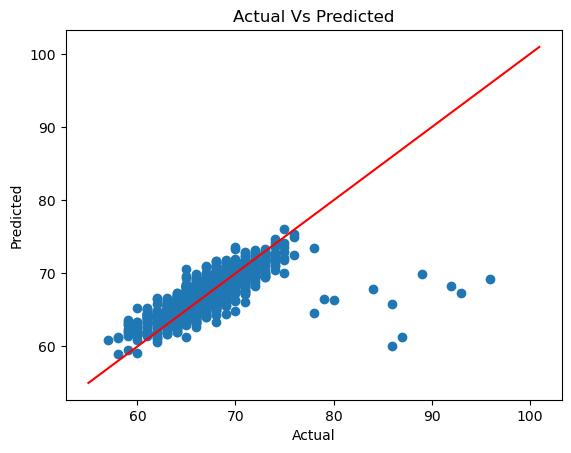

In [59]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Predicted")
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red')
plt.show()


In [62]:
#BONUS:POLYNOMIAL FEATURES
poly=PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [64]:
model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train)

LinearRegression()

In [65]:
y_pred_poly = model_poly.predict(x_test_poly)

In [70]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Performance (Degree=2)")
print(f"MAE: {mae_poly}")
print(f"MSE: {mse_poly}")
print(f"RMSE: {rmse_poly}")
print(f"R² Score: {r2_poly}")

Polynomial Regression Performance (Degree=2)
MAE: 1.4815264449022194
MSE: 6.415789676597807
RMSE: 2.5329409145492927
R² Score: 0.5361807454501457
